<a href="https://colab.research.google.com/github/AjmalSarwary/Preprocessing/blob/main/principal_component_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Neuer Abschnitt

In [ ]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [ ]:
#Generate Array of 100 Gene Names
genes = ['gene' + str(i) for i in range(1,101)]

#Create Arrays of sample names 5 x wilde type (wt) and 5 x knock out (ko)
wt = ['wt' +str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

data = pd.DataFrame(columns=[*wt, *ko], index=genes)

for gene in data.index:
  data.loc[gene,'wt1':'wt5']=np.random.poisson(lam=rd.randrange(10,1000), size=5)
  data.loc[gene,'ko1':'ko5']=np.random.poisson(lam=rd.randrange(10,1000), size=5)

print(data.shape)
data.head()

(100, 10)


,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,222,193,191,231,228,929,939,956,979,989
gene2,827,841,849,803,900,654,641,678,617,671
gene3,320,288,288,263,286,622,554,612,593,605
gene4,912,917,935,977,885,906,830,866,892,907
gene5,475,433,429,482,462,854,855,895,885,844


In [ ]:
#Center and Scale the data
#after centering: the mean value for each gene will be 0
#after scaling the stdev for the values for each gene will be 1
#the scale function expects data to be in rows instead of columns

scaled_data=preprocessing.scale(data.T)

In [ ]:
pca = PCA()
pca.fit(scaled_data)
#next step creates coordinates for PCA graph based on loading scores and scaled data
pca_data=pca.transform(scaled_data)

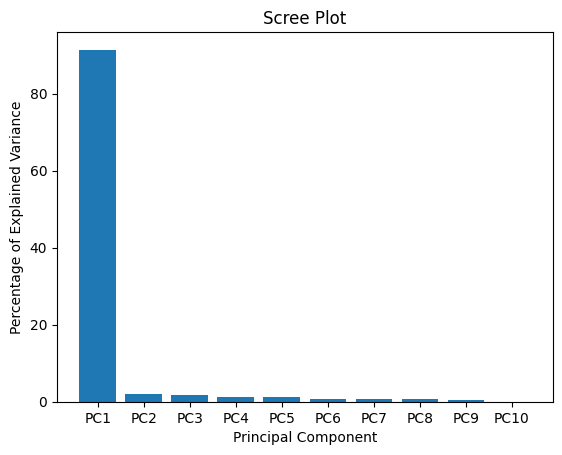

In [ ]:
#scree plot to determine how many PCs should go into the final plot
#1st calculate percentage of variation that each PC accounts for
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
#labels for scree plot
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

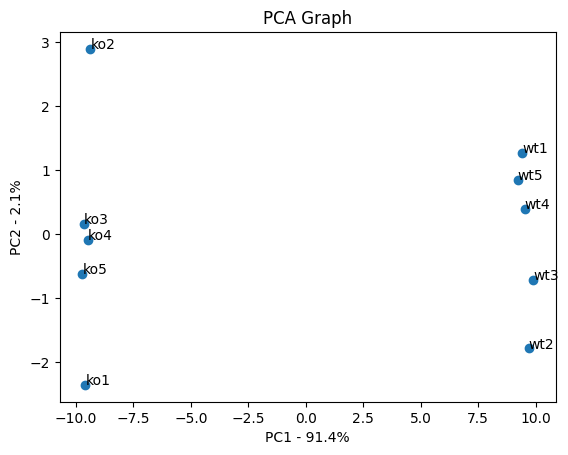

In [ ]:
#new coordinates matrix where rows have sample labels and columns have PC labels
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

#use loop to add sample names to the graph
for sample in pca_df.index:
  plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

In [ ]:
#investigate the loading scores for PC1 to determine which gene had the largest influence on separating the two clusters along the x-axis
loading_scores = pd.Series(pca.components_[0], index=genes)
#magnitues sorted
sorted_loading_scores=loading_scores.abs().sort_values(ascending=False)

top_10_genes = sorted_loading_scores[0:10].index.values

#if values are similar, means a lot of genes played a role in separating the sample, rather than just one or two
loading_scores[top_10_genes]

gene69   -0.104584
gene80    0.104575
gene31    0.104567
gene20    0.104525
gene1    -0.104495
gene16   -0.104493
gene23   -0.104484
gene42    0.104467
gene50   -0.104464
gene53   -0.104427
dtype: float64